<div style="direction:rtl;">
<p>
گزارش پروژه
</p>
<p>
دانشجو : ایمان خلیل الرحمانی
</p>
<p>
مقدمه:
</p>
هدف این پروژه تحلیل داده‌های مربوط به بیماری قلبی و مقایسه دقت مدل‌های دسته‌بندی درخت تصمیم و بیزین ساده است. همچنین، تأثیر انتخاب ویژگی‌ها بر عملکرد مدل‌ها بررسی شده است.

<p>
مراحل کار:
</p>
<p>
پیش‌پردازش داده‌ها:
</p>
<p>
داده‌ها برای مقادیر گمشده بررسی و در صورت لزوم جایگزینی شدند.
داده‌ها استانداردسازی شدند.
</p>
<p>
روش‌های مورد استفاده:
</p>
دو مدل اصلی: درخت تصمیم و بیزین ساده.
کاهش ویژگی‌ها با استفاده از RFE (حذف ویژگی‌های کم‌اهمیت).
مقایسه نتایج قبل و بعد از کاهش ویژگی‌ها.
<p>
اعتبارسنجی:

استفاده از Cross-Validation برای ارزیابی پایداری مدل‌ها.
</p>
<div>


مرحله 1: بارگذاری داده‌ها و بررسی اولیه
توضیح:
ابتدا داده‌ها را بارگذاری کرده و وضعیت آن‌ها (مانند داده‌های گمشده) را بررسی می‌کنیم.

In [ ]:
# 1. بارگذاری داده‌ها
import pandas as pd
import numpy as np

data = pd.read_csv('/content/heart_disease_dataset.csv')

# نمایش پنج سطر اول داده
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


مرحله 2: بررسی داده‌های گمشده و جایگزینی مقادیر
توضیح:
مقادیر گمشده را با میانگین هر ستون جایگزین می‌کنیم تا داده‌ها آماده پردازش شوند.

In [ ]:
# 2. بررسی داده‌های گمشده و جایگزینی آن‌ها
if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)

# نمایش اطلاعات کلی داده‌ها
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


مرحله 3: جداسازی ویژگی‌ها و برچسب‌ها
توضیح:
ستون‌های ویژگی‌ها را از ستون برچسب (خروجی) جدا می‌کنیم.

In [ ]:
# 3. جداسازی ویژگی‌ها و برچسب‌ها
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


مرحله 4: استانداردسازی داده‌ها
توضیح:
برای مقیاس‌بندی داده‌ها از StandardScaler استفاده می‌کنیم.

In [ ]:
# 4. استانداردسازی داده‌ها
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


مرحله 5: تقسیم داده‌ها به آموزش و تست
توضیح:
داده‌ها را به دو بخش آموزش (70٪) و تست (30٪) تقسیم می‌کنیم.

In [ ]:
# 5. تقسیم داده‌ها به آموزش و تست
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


مرحله 6: مدل درخت تصمیم
توضیح:
مدل درخت تصمیم را آموزش می‌دهیم و دقت آن را محاسبه می‌کنیم.

In [ ]:
# 6. مدل درخت تصمیم
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Decision Tree): {accuracy_tree:.2f}")


Accuracy (Decision Tree): 0.71


مرحله 7: مدل بیزین ساده
توضیح:
مدل Naive Bayes را آموزش داده و دقت آن را محاسبه می‌کنیم.

In [ ]:
# 7. مدل بیزین ساده
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred_bayes = naive_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy (Naive Bayes): {accuracy_bayes:.2f}")


Accuracy (Naive Bayes): 0.47


مرحله 8: اعتبارسنجی متقابل
توضیح:
دقت مدل‌ها را با استفاده از اعتبارسنجی متقابل (Cross-Validation) محاسبه می‌کنیم.

In [ ]:
# 8. اعتبارسنجی متقابل
from sklearn.model_selection import cross_val_score

cv_scores_tree = cross_val_score(decision_tree, X_scaled, y, cv=5)
cv_scores_bayes = cross_val_score(naive_bayes, X_scaled, y, cv=5)

print(f"Cross-Validation Accuracy (Decision Tree): {cv_scores_tree.mean():.2f}")
print(f"Cross-Validation Accuracy (Naive Bayes): {cv_scores_bayes.mean():.2f}")


Cross-Validation Accuracy (Decision Tree): 0.75
Cross-Validation Accuracy (Naive Bayes): 0.62


مرحله 9: بررسی اهمیت ویژگی‌ها
توضیح:
میزان اهمیت هر ویژگی را در مدل درخت تصمیم بررسی کرده و نمودار آن را رسم می‌کنیم.

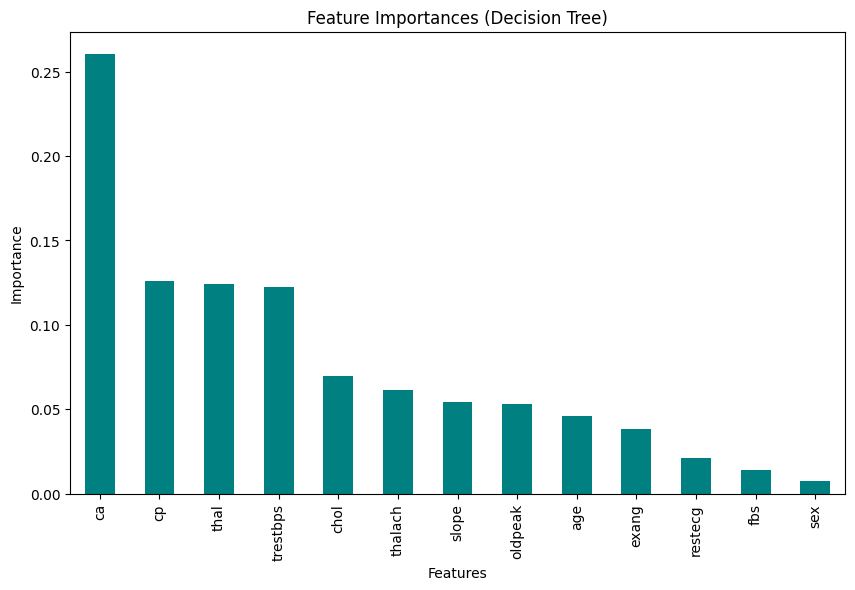

In [ ]:
# 9. اهمیت ویژگی‌ها
import matplotlib.pyplot as plt
import seaborn as sns

features_importance = pd.Series(decision_tree.feature_importances_, index=X.columns)

# رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
features_importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Feature Importances (Decision Tree)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


مرحله 10: کاهش ویژگی‌ها با RFE
توضیح:
با استفاده از RFE تعداد ویژگی‌ها را به 8 کاهش می‌دهیم و مدل‌ها را دوباره آموزش می‌دهیم.

In [ ]:
# 10. کاهش ویژگی‌ها
from sklearn.feature_selection import RFE

selector = RFE(decision_tree, n_features_to_select=8)
selector.fit(X_scaled, y)
X_reduced = X_scaled[:, selector.support_]

# تقسیم داده‌ها با ویژگی‌های کاهش‌یافته
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)


مرحله 11: مدل‌سازی با ویژگی‌های کاهش‌یافته
توضیح:
مدل‌ها را با داده‌های کاهش‌یافته آموزش داده و دقت آن‌ها را محاسبه می‌کنیم.

In [ ]:
# درخت تصمیم با ویژگی‌های کاهش‌یافته
decision_tree.fit(X_train_reduced, y_train)
accuracy_tree_reduced = accuracy_score(y_test, decision_tree.predict(X_test_reduced))

# بیزین ساده با ویژگی‌های کاهش‌یافته
naive_bayes.fit(X_train_reduced, y_train)
accuracy_bayes_reduced = accuracy_score(y_test, naive_bayes.predict(X_test_reduced))

print(f"Accuracy (Reduced Decision Tree): {accuracy_tree_reduced:.2f}")
print(f"Accuracy (Reduced Naive Bayes): {accuracy_bayes_reduced:.2f}")


Accuracy (Reduced Decision Tree): 0.68
Accuracy (Reduced Naive Bayes): 0.47


مرحله 12: مقایسه نهایی دقت مدل‌ها
توضیح:
دقت مدل‌ها را قبل و بعد از کاهش ویژگی‌ها در نمودار مقایسه می‌کنیم.

<ipython-input-13-20dc2348bc18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


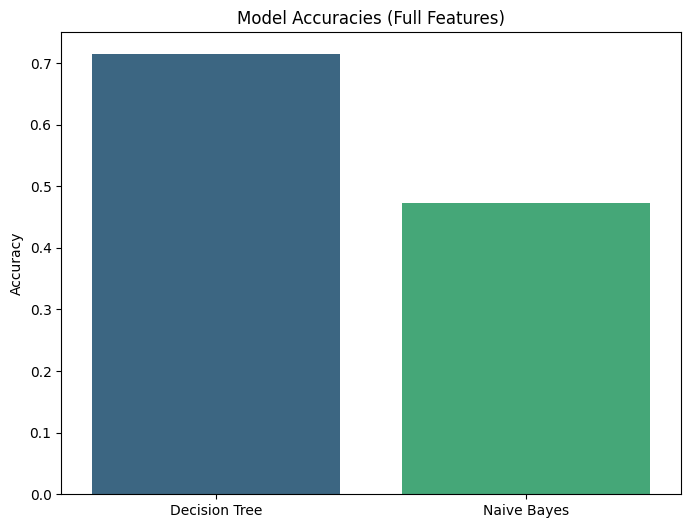

<ipython-input-13-20dc2348bc18>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_reduced, y=accuracies_reduced, palette="magma")


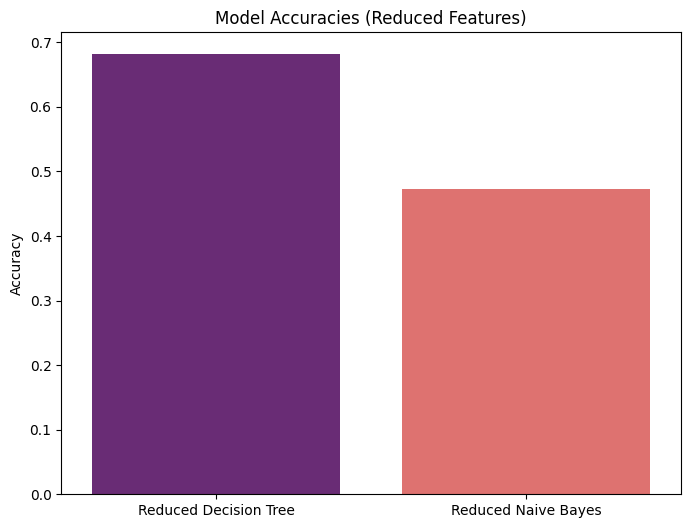

In [ ]:
# دقت مدل‌ها
models = ['Decision Tree', 'Naive Bayes']
accuracies = [accuracy_tree, accuracy_bayes]
models_reduced = ['Reduced Decision Tree', 'Reduced Naive Bayes']
accuracies_reduced = [accuracy_tree_reduced, accuracy_bayes_reduced]

# نمودار دقت مدل‌ها
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Model Accuracies (Full Features)')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=models_reduced, y=accuracies_reduced, palette="magma")
plt.title('Model Accuracies (Reduced Features)')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.metrics import recall_score

# Recall for Decision Tree
recall_tree = recall_score(y_test, y_pred_tree)

# Recall for Naive Bayes
recall_bayes = recall_score(y_test, y_pred_bayes)

print(f"Recall (Decision Tree): {recall_tree:.2f}")
print(f"Recall (Naive Bayes): {recall_bayes:.2f}")


Recall (Decision Tree): 0.67
Recall (Naive Bayes): 0.98


In [ ]:
from sklearn.metrics import precision_score, f1_score, accuracy_score

# Precision و F1-Score برای مدل درخت تصمیم
precision_tree = precision_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Precision و F1-Score برای مدل Naive Bayes
precision_bayes = precision_score(y_test, y_pred_bayes)
f1_bayes = f1_score(y_test, y_pred_bayes)

# دقت (Accuracy) برای هر مدل
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)

# نمایش نتایج
print(f"Precision (Decision Tree): {precision_tree:.2f}")
print(f"F1-Score (Decision Tree): {f1_tree:.2f}")
print(f"Accuracy (Decision Tree): {accuracy_tree:.2f}")

print(f"Precision (Naive Bayes): {precision_bayes:.2f}")
print(f"F1-Score (Naive Bayes): {f1_bayes:.2f}")
print(f"Accuracy (Naive Bayes): {accuracy_bayes:.2f}")


Precision (Decision Tree): 0.71
F1-Score (Decision Tree): 0.69
Accuracy (Decision Tree): 0.71
Precision (Naive Bayes): 0.47
F1-Score (Naive Bayes): 0.64
Accuracy (Naive Bayes): 0.47


1- KMeans

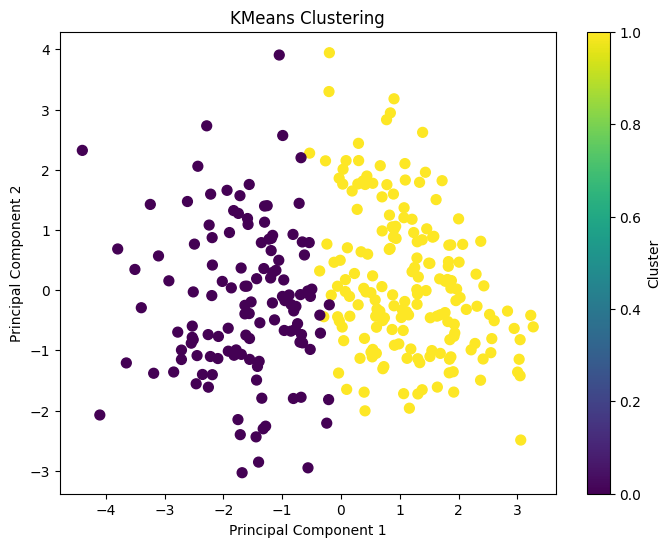

In [ ]:
from sklearn.decomposition import PCA

# کاهش ابعاد برای رسم
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# اجرای KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# رسم خروجی
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


1-2 Inertia

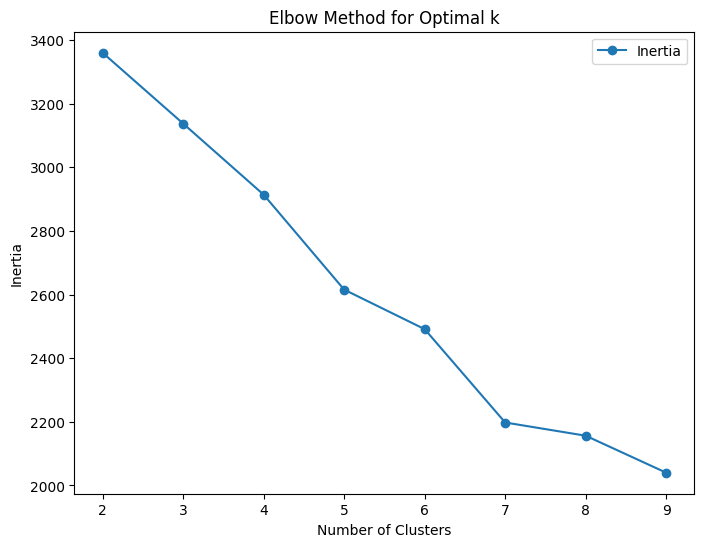

In [ ]:
from sklearn.metrics import silhouette_score

# یافتن بهترین تعداد خوشه‌ها
inertia = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# رسم Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()


2- Hierarchical Clustering

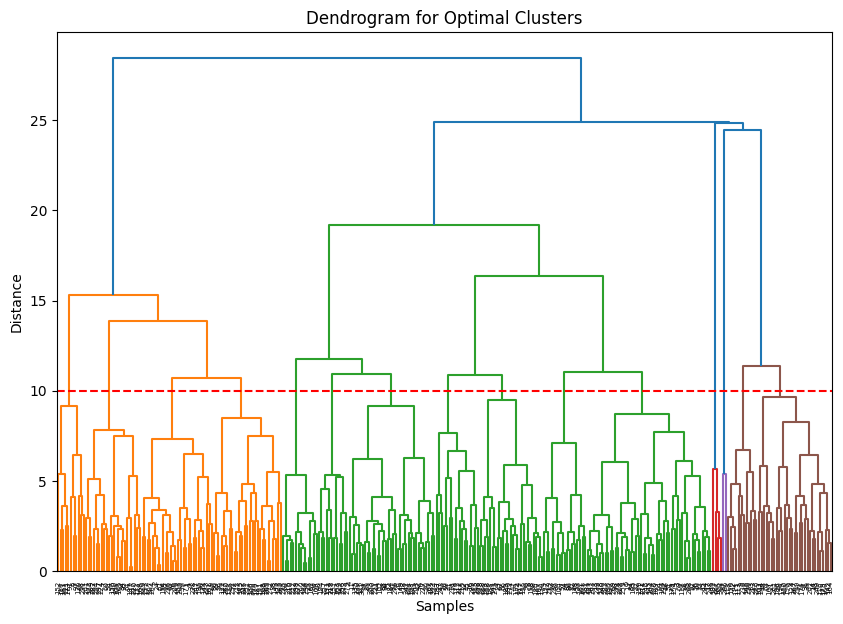

In [ ]:
# دندروگرام برای انتخاب تعداد خوشه‌ها
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Optimal Clusters')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--')  # خط برای انتخاب تعداد خوشه
plt.show()


4- MeanShift

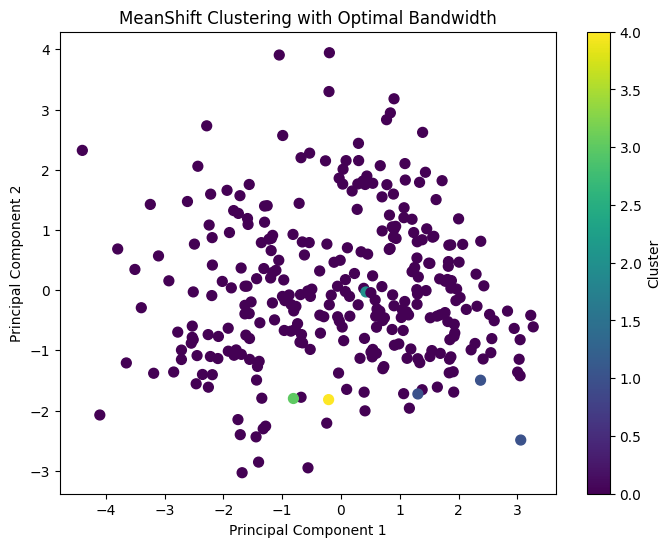

In [ ]:
from sklearn.cluster import estimate_bandwidth

# محاسبه پهنای باند بهینه
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(X_scaled)

# رسم نتایج
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mean_shift_labels, cmap='viridis', s=50)
plt.title('MeanShift Clustering with Optimal Bandwidth')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


5- DBSCAN

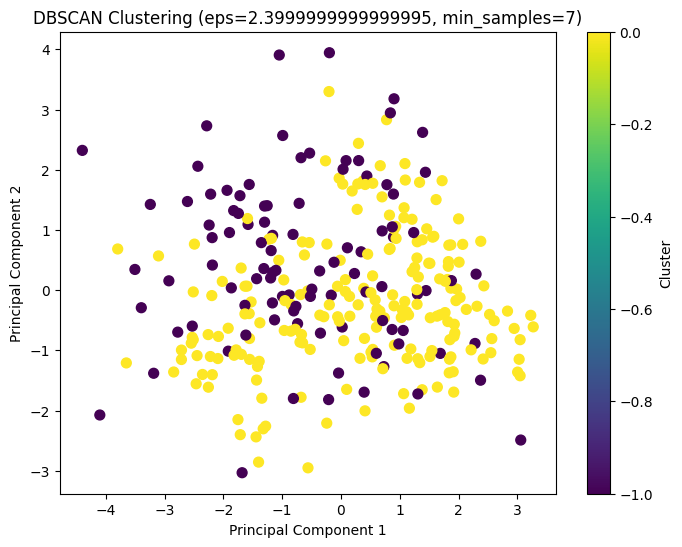

In [ ]:
# یافتن بهترین eps و min_samples
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.5, 2.5, 0.1)
min_samples_values = range(3, 10)
best_eps, best_min_samples, best_score = 0, 0, -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(np.unique(labels)) > 1:  # حداقل یک خوشه ایجاد شده باشد
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_eps, best_min_samples, best_score = eps, min_samples, score

# اجرای DBSCAN با بهترین پارامترها
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# رسم خروجی
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


نتیجه

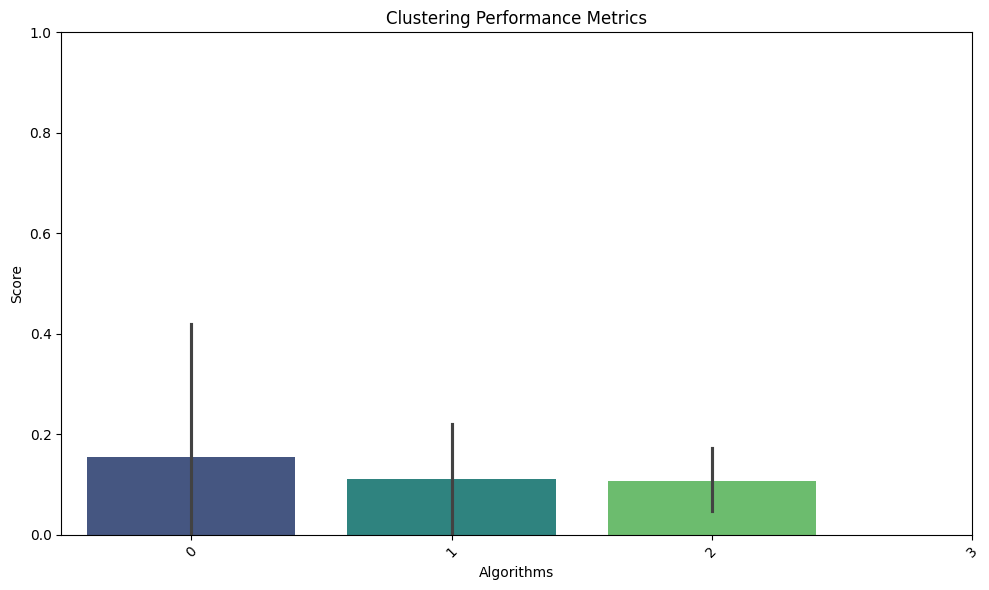

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df[['Silhouette Score', 'ARI', 'Homogeneity']], palette="viridis")
plt.title('Clustering Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Algorithms')
plt.xticks(ticks=range(len(results_df)), labels=results_df.index, rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
